# Quiz 4

In [1]:
import numpy
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [7]:
h41 = pd.read_csv("homework_4.1.csv")
h42a = pd.read_csv("homework_4.2.a.csv")
h42b = pd.read_csv("homework_4.2.b.csv")

In [8]:
h41

,Z,W,X,Y
0,0,-0.155644,-0.496971,0.282484
1,1,0.529539,2.284240,4.740596
2,1,0.910514,0.872232,3.449569
3,1,-0.705476,2.157260,3.002531
4,0,-0.590874,-0.386730,-1.848796
...,...,...,...,...
4995,0,-0.976289,0.482060,-0.830112
4996,0,0.677586,-0.580264,1.106948
4997,0,-0.829560,0.895967,-0.612659
4998,0,-1.126846,-0.178558,-2.882220


In [9]:
y_diff = h41[h41.Z==1].Y.mean() - h41[h41.Z==0].Y.mean()
x_diff = h41[h41.Z==1].X.mean() - h41[h41.Z==0].X.mean()
y_diff / x_diff

np.float64(1.5618587073765748)

(array([3.600e+01, 1.580e+02, 7.730e+02, 1.452e+03, 1.474e+03, 7.890e+02,
        2.720e+02, 3.800e+01, 7.000e+00, 1.000e+00]),
 array([-3.30340619, -2.4947399 , -1.68607361, -0.87740732, -0.06874104,
         0.73992525,  1.54859154,  2.35725783,  3.16592412,  3.9745904 ,
         4.78325669]),
 <BarContainer object of 10 artists>)

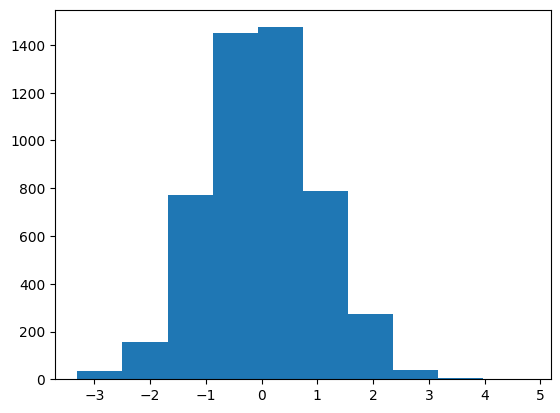

In [30]:
plt.hist(h41.W)

In [ ]:
h41_bin = h41[(h41.W >= -1) & (h41.W <= -0.5) | (h41.W >= 0.5) & (h41.W <= 1)]
y_diff_bin = h41_bin[h41_bin.Z==1].Y.mean() - h41_bin[h41_bin.Z==0].Y.mean()
x_diff_bin = h41_bin[h41_bin.Z==1].X.mean() - h41_bin[h41_bin.Z==0].X.mean()
y_diff_bin / x_diff_bin

np.float64(1.4935855827286728)

In [11]:
h42a

,X,Y
0,81.822339,1
1,92.487870,0
2,85.372460,0
3,78.828025,0
4,75.807080,1
...,...,...
99995,92.542635,1
99996,81.713212,0
99997,76.949186,0
99998,71.790575,0


In [13]:
h42a["above_cutoff"] = 1 * (h42a.X >= 80)

In [17]:
h42b["above_cutoff"] = 1 * (h42b.X2 >= 80)

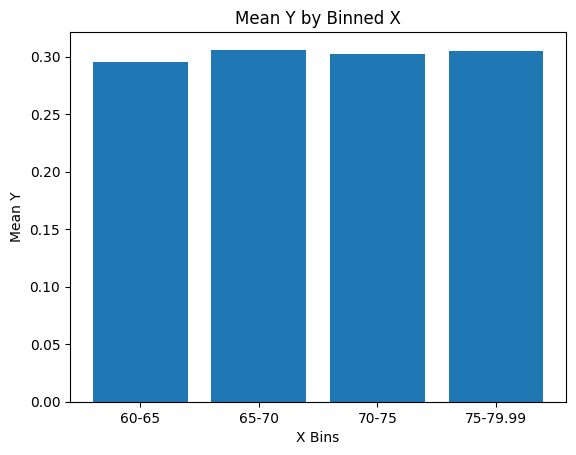

In [22]:
# Binned X
h42a_bin1 = h42a[(h42a.X >= 60) & (h42a.X <= 65)]
h42a_bin2 = h42a[(h42a.X > 65) & (h42a.X <= 70)]
h42a_bin3 = h42a[(h42a.X > 70) & (h42a.X <= 75)]
h42a_bin4 = h42a[(h42a.X > 75) & (h42a.X <= 79.99)]

# Y means
h42a_bin1_y_mean = h42a_bin1.Y.mean()
h42a_bin2_y_mean = h42a_bin2.Y.mean()
h42a_bin3_y_mean = h42a_bin3.Y.mean()
h42a_bin4_y_mean = h42a_bin4.Y.mean()

# Bar Plot of binned X by their Y means
plt.bar(
    ["60-65", "65-70", "70-75", "75-79.99"],
    [h42a_bin1_y_mean, h42a_bin2_y_mean, h42a_bin3_y_mean, h42a_bin4_y_mean],
)
plt.xlabel("X Bins")
plt.ylabel("Mean Y")
plt.title("Mean Y by Binned X")
plt.show()



Optimization terminated successfully.
         Current function value: 0.658240
         Iterations 5


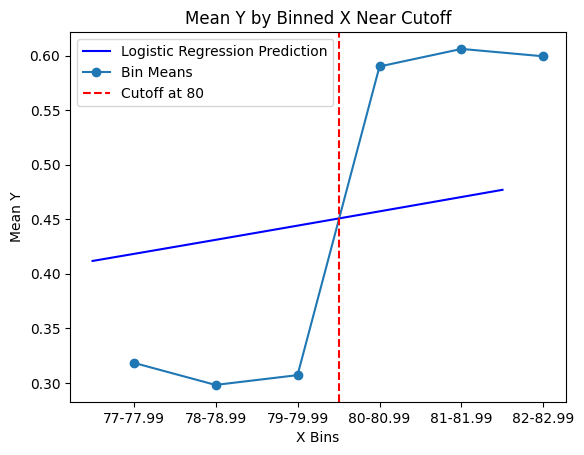

In [40]:
h42a_bin77 = h42a[(h42a.X >= 77) & (h42a.X <= 77.99)]
h42a_bin78 = h42a[(h42a.X >= 78) & (h42a.X <= 78.99)]
h42a_bin79 = h42a[(h42a.X >= 79) & (h42a.X <= 79.99)]
h42a_bin80 = h42a[(h42a.X >= 80) & (h42a.X <= 80.99)]
h42a_bin81 = h42a[(h42a.X >= 81) & (h42a.X <= 81.99)]
h42a_bin82 = h42a[(h42a.X >= 82) & (h42a.X <= 82.99)]

h42a_bin78_y_mean = h42a_bin78.Y.mean()
h42a_bin79_y_mean = h42a_bin79.Y.mean()
h42a_bin80_y_mean = h42a_bin80.Y.mean()
h42a_bin81_y_mean = h42a_bin81.Y.mean()
h42a_bin82_y_mean = h42a_bin82.Y.mean()

model = smf.logit("Y ~ X", data=h42a).fit()
x_vals = numpy.linspace(77, 82, 100)
y_vals = model.predict(pd.DataFrame({"X": x_vals}))
plt.plot(x_vals, y_vals, label="Logistic Regression Prediction", color="blue")

bin_midpoints = [77.5, 78.5, 79.5, 80.5, 81.5, 82.5]
plt.plot(
    bin_midpoints,
    [
        h42a_bin77.Y.mean(),
        h42a_bin78_y_mean,
        h42a_bin79_y_mean,
        h42a_bin80_y_mean,
        h42a_bin81_y_mean,
        h42a_bin82_y_mean,
    ],
    marker="o",
    label="Bin Means",
)
plt.xticks(bin_midpoints, ["77-77.99", "78-78.99", "79-79.99", "80-80.99", "81-81.99", "82-82.99"])
plt.xlabel("X Bins")
plt.ylabel("Mean Y")
plt.title("Mean Y by Binned X Near Cutoff")
plt.axvline(x=80, color="r", linestyle="--", label="Cutoff at 80")
plt.legend()
plt.show()


In [26]:
model_h42a = smf.ols("Y ~ X + above_cutoff", data=h42a).fit()
print(model_h42a.params)

Intercept       0.289173
X               0.000195
above_cutoff    0.295724
dtype: float64


In [28]:
# Compare slope before and after cutoff
slope_before_cutoff = model_h42a.params["X"]
slope_after_cutoff = model_h42a.params["X"] + model_h42a.params["above_cutoff"]
print(f"Slope before cutoff: {slope_before_cutoff}")
print(f"Slope after cutoff: {slope_after_cutoff}")

Slope before cutoff: 0.00019491091008923457
Slope after cutoff: 0.29591937517585637


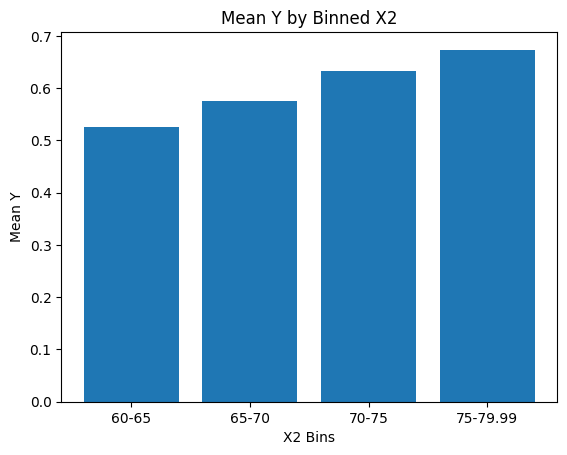

In [24]:
# Binned X2
h42b_bin1 = h42b[(h42b.X2 >= 60) & (h42b.X2 <= 65)]
h42b_bin2 = h42b[(h42b.X2 > 65) & (h42b.X2 <= 70)]
h42b_bin3 = h42b[(h42b.X2 > 70) & (h42b.X2 <= 75)]
h42b_bin4 = h42b[(h42b.X2 > 75) & (h42b.X2 <= 79.99)]

# Y means
h42b_bin1_y_mean = h42b_bin1.Y2.mean()
h42b_bin2_y_mean = h42b_bin2.Y2.mean()
h42b_bin3_y_mean = h42b_bin3.Y2.mean()
h42b_bin4_y_mean = h42b_bin4.Y2.mean()

# Bar Plot of binned X2 by their Y means
plt.bar(
    ["60-65", "65-70", "70-75", "75-79.99"],
    [h42b_bin1_y_mean, h42b_bin2_y_mean, h42b_bin3_y_mean, h42b_bin4_y_mean],
)
plt.xlabel("X2 Bins")
plt.ylabel("Mean Y")
plt.title("Mean Y by Binned X2")
plt.show()



In [27]:
model_h42b = smf.ols("Y2 ~ X2 + above_cutoff", data=h42b).fit()
print(model_h42b.params)

Intercept       0.056712
X2              0.007832
above_cutoff    0.194098
dtype: float64


In [29]:
# Comparing slope before and after cutoff
slope_before_cutoff_b = model_h42b.params["X2"]
slope_after_cutoff_b = model_h42b.params["X2"] + model_h42b.params["above_cutoff"]
print(f"Slope before cutoff: {slope_before_cutoff_b}")
print(f"Slope after cutoff: {slope_after_cutoff_b}")

Slope before cutoff: 0.00783240616759331
Slope after cutoff: 0.2019302942067773
